# Cancer prediction

## Module imports

In [64]:
import pandas as pd
import numpy as np

# Data visualization library
import seaborn as sns

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix

## Importing dataset

In [65]:
!unzip /content/cancer_data.csv.zip

Archive:  /content/cancer_data.csv.zip
replace cancer_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [66]:
DATASET_PATH = '/content/cancer_data.csv'
df = pd.read_csv(DATASET_PATH)

## Exploratory Data Analysis

In [67]:
df.shape

(683, 11)

In [68]:
## Checking for null values
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [69]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [70]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [71]:
## Let's see what are the classes
df['Class'].unique()

array([2, 4])

2 : Non cancerous
4 : Cancerous

We are mapping 2 with 0(non cancerous) and 4 with 1(cancerous)

In [72]:
df['Class'] = df['Class'].map({2:0,4:1})

In [73]:
class_names = ['non-cancerous','cancerous']

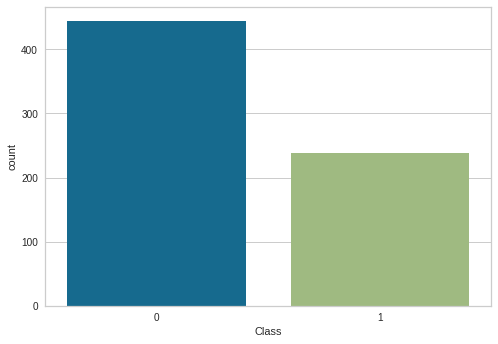

In [74]:
## Total counts of these classes 
sns.countplot(df['Class'])

These is an imbalance dataset

In [75]:
## Dropping the sample code number
df.drop('Sample code number',axis=1,inplace=True)

## Splitting the dataset into Train and test set

In [76]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.2,random_state=42)

In [77]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [78]:
print('Shape of x train : ', x_train.shape)
print('Shape of x test : ', x_test.shape)
print('Shape of y train : ', y_train.shape)
print('Shape of y test : ', y_test.shape)

Shape of x train :  (546, 9)
Shape of x test :  (137, 9)
Shape of y train :  (546,)
Shape of y test :  (137,)


## Rescaling the data using MinMaxScaler

In [79]:
transformer = MinMaxScaler()
transformer.fit(x_train)

MinMaxScaler()

In [80]:
x_train_scaled = transformer.transform(x_train)
x_test_scaled = transformer.transform(x_test)

## Cross validation

In [86]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

## Models

In [87]:
def fit_model(model,dataset,cv=None):
  x = dataset[0]
  y = dataset[1]

  f1_evaluation =[]
  for train_index, test_index in cv.split(x, y): 
    X_train_fold, X_test_fold = x[train_index], x[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    model.fit(X_train_fold, y_train_fold) 
    y_pred = model.predict(X_test_fold)
    f1 = f1_score(y_test_fold,y_pred)
    f1_evaluation.append(f1)

  return model,f1_evaluation

In [88]:
def metrics(y_true,y_pred,f1_scores_list=None):
  print('f1 score :',f1_score(y_true,y_pred))
  print()
  print('accuracy :',accuracy_score(y_true,y_pred))
  print()
  print('Classification Report--')
  print(classification_report(y_true,y_pred,target_names=class_names))
  print()
  print('Confussion matrix--')
  print(confusion_matrix(y_true,y_pred))
  print()
  if f1_scores_list is not None:
    print('Minimum f1 score[TRAINING] :',min(f1_scores_list))
    print('Maximum f1 score[TRAINING] :',max(f1_scores_list))
    print('Average f1 score[TRAINING] :',np.mean(f1_scores_list))



### Naive Bias

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb,f1_scores_nb = fit_model(nb,[x_train_scaled,y_train],cv=cv)

In [28]:
y_pred = nb.predict(x_test_scaled)

In [29]:
metrics(y_test,y_pred,f1_scores_nb)

f1 score : 0.9572649572649573

accuracy : 0.9635036496350365

Classification Report--
               precision    recall  f1-score   support

non-cancerous       0.97      0.96      0.97        79
    cancerous       0.95      0.97      0.96        58

     accuracy                           0.96       137
    macro avg       0.96      0.96      0.96       137
 weighted avg       0.96      0.96      0.96       137


Confussion matrix--
[[76  3]
 [ 2 56]]

Minimum f1 score[TRAINING] : 0.8888888888888888
Maximum f1 score[TRAINING] : 0.972972972972973
Average f1 score[TRAINING] : 0.9471247833763881


### Ridge Classifier

### Random Forest Classifier

### Logistic Regression

### K-Nearest Neighbours

### Feed-forward-neural-network

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [63]:
tf.random.set_seed(200)

#model

fnn = tf.keras.Sequential()

## adding layers

fnn.add(tf.keras.layers.Dense(4,activation='relu'))
fnn.add(tf.keras.layers.Dense(2,activation='relu'))
fnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))
             
#compile
fnn.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics =['accuracy'])
             
#fitting data
history = fnn.fit(x_train_scaled,
            y_train,
            validation_data=(x_test_scaled,y_test),
            epochs=50)


Epoch 1/50
18/18 [==============================] - 1s 11ms/step - loss: 0.6876 - accuracy: 0.6960 - val_loss: 0.6808 - val_accuracy: 0.7080
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.7875 - val_loss: 0.6707 - val_accuracy: 0.7518
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.8425 - val_loss: 0.6576 - val_accuracy: 0.8102
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.8663 - val_loss: 0.6430 - val_accuracy: 0.8467
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.9011 - val_loss: 0.6273 - val_accuracy: 0.9051
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.9212 - val_loss: 0.6118 - val_accuracy: 0.9270
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.9304 - val_loss: 0.5958 - val_accuracy: 0.9343
Epoch 8/50
18/18 [=

<Figure size 864x720 with 0 Axes>

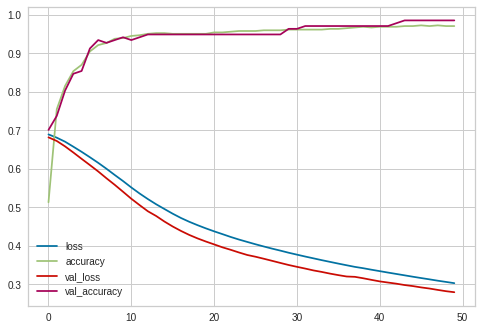

In [56]:
plt.figure(figsize=(12,10))
pd.DataFrame(history.history).plot()


In [57]:
y_pred = fnn.predict(x_test_scaled)
y_pred = tf.round(y_pred).numpy()

In [58]:
metrics(y_test,y_pred)

f1 score : 0.983050847457627

accuracy : 0.9854014598540146

Classification Report--
               precision    recall  f1-score   support

non-cancerous       1.00      0.97      0.99        79
    cancerous       0.97      1.00      0.98        58

     accuracy                           0.99       137
    macro avg       0.98      0.99      0.99       137
 weighted avg       0.99      0.99      0.99       137


Confussion matrix--
[[77  2]
 [ 0 58]]

